In [1]:
import requests
import json

url = 'https://rest.coinapi.io/v1/ohlcv/HUOBIPRO_SPOT_GST_USDT/history'

headers = {'X-CoinAPI-Key' : '25AE8ED3-3364-4CFA-9AB4-43BC6F602E05'}

parameters = {
    'period_id' : '1DAY',
    'time_start' : '2022-01-01T00:00',
    'limit' : '150'
}
try:
    response = requests.get(url, headers=headers, params=parameters)
except (requests.ConnectionError, requests.Timeout, requests.TooManyRedirects) as e:
    print(e)

gst_data = json.loads(response.text)
gst_data

[{'time_period_start': '2022-03-09T00:00:00.0000000Z',
  'time_period_end': '2022-03-10T00:00:00.0000000Z',
  'time_open': '2022-03-09T16:08:49.6620000Z',
  'time_close': '2022-03-09T23:54:53.3280000Z',
  'price_open': 3.0943,
  'price_high': 3.1225,
  'price_low': 3.0875,
  'price_close': 3.1067,
  'volume_traded': 1810.236699999,
  'trades_count': 166},
 {'time_period_start': '2022-03-10T00:00:00.0000000Z',
  'time_period_end': '2022-03-11T00:00:00.0000000Z',
  'time_open': '2022-03-10T00:00:13.6860000Z',
  'time_close': '2022-03-10T23:59:40.3020000Z',
  'price_open': 3.1064,
  'price_high': 3.333,
  'price_low': 3.0909,
  'price_close': 3.2372,
  'volume_traded': 31817.345168504,
  'trades_count': 2013},
 {'time_period_start': '2022-03-11T00:00:00.0000000Z',
  'time_period_end': '2022-03-12T00:00:00.0000000Z',
  'time_open': '2022-03-11T00:01:16.0550000Z',
  'time_close': '2022-03-11T23:59:18.3960000Z',
  'price_open': 3.2368,
  'price_high': 3.4347,
  'price_low': 3.2334,
  'price_

In [20]:
gst_price_history = []
for day in gst_data:
    gst_price_history.append([
        day['time_period_start'][:10], 
        (float(day['price_open']) + float(day['price_close'])/2),
        float(day['volume_traded'])
        ])

In [22]:
import pandas as pd

pd_gst_price_history = pd.DataFrame(gst_price_history, columns = ['date', 'price','volume'])
pd_gst_price_history['new_date'] = pd.to_datetime(pd_gst_price_history['date'])
pd_gst_price_history

,date,price,volume,new_date
0,2022-03-09,4.64765,1.810237e+03,2022-03-09
1,2022-03-10,4.72500,3.181735e+04,2022-03-10
2,2022-03-11,4.87410,3.337441e+04,2022-03-11
3,2022-03-12,4.91855,3.827281e+04,2022-03-12
4,2022-03-13,5.11315,1.587154e+05,2022-03-13
...,...,...,...,...
145,2022-08-01,0.08745,5.878812e+06,2022-08-01
146,2022-08-02,0.08395,3.513263e+06,2022-08-02
147,2022-08-03,0.08340,3.399035e+06,2022-08-03
148,2022-08-04,0.08305,1.972407e+06,2022-08-04


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

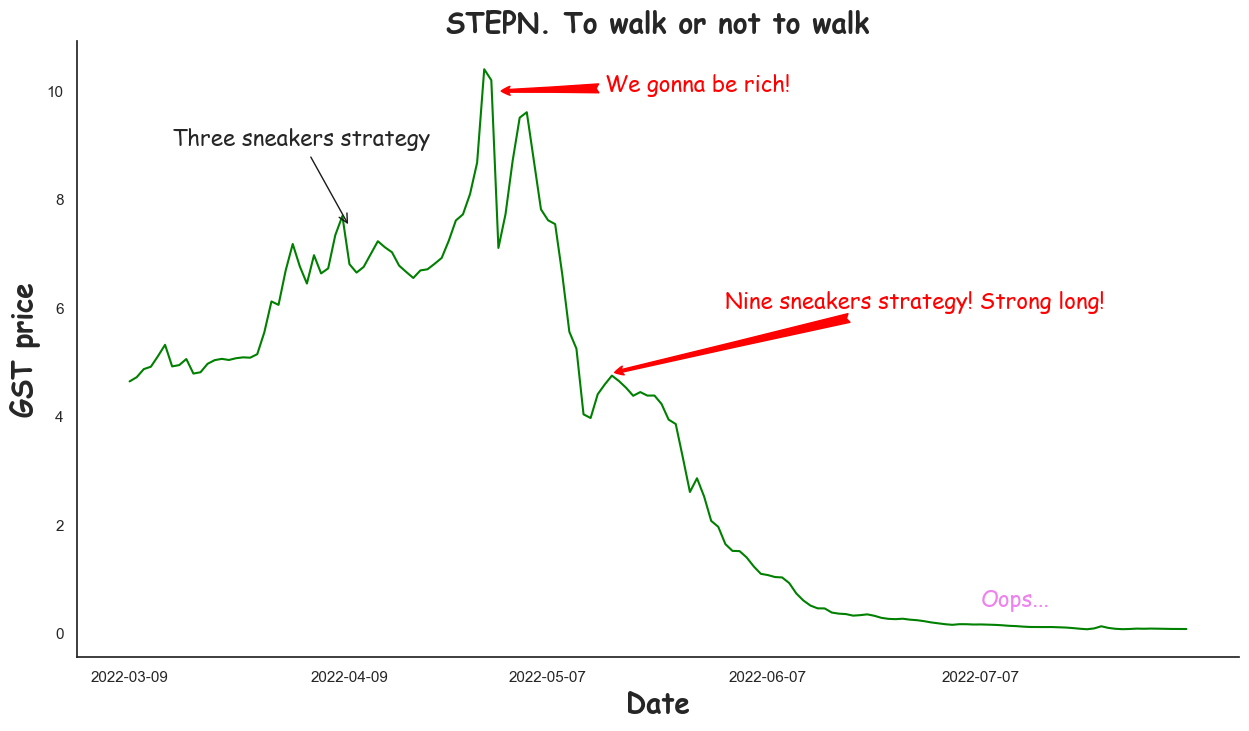

In [82]:
import matplotlib.dates as mdates
import numpy as np

def get_date_coordinate(date):
    return mdates.date2num(np.datetime64(date)) - mdates.date2num(np.datetime64(pd_gst_price_history.iloc[0]['new_date']))

sns.set_style('white')

fig, ax = plt.subplots(figsize = (15, 8))

ax.plot('date', 'price', data=pd_gst_price_history, color='green')
ax.set_title('STEPN. To walk or not to walk', 
            fontsize=20, 
            fontweight='heavy', 
            fontname='Comic Sans MS')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.set_xlabel('Date', fontsize = 20, fontweight = "bold", fontname='Comic Sans MS')

ax.annotate('Three sneakers strategy', xy=(get_date_coordinate('2022-04-09'), 7.5), 
            xytext=(get_date_coordinate('2022-03-15'), 9),
            arrowprops=dict(arrowstyle='->', color='k'),
            fontsize = 16,
            fontname='Comic Sans MS'
            )
ax.annotate('We gonna be rich!', xy=(get_date_coordinate('2022-04-30'), 10), 
            xytext=(get_date_coordinate('2022-05-15'), 10),
            arrowprops=dict(arrowstyle='fancy', color='red'),
            fontsize = 16,
            fontname='Comic Sans MS',
            color='red'
            )
ax.annotate('Nine sneakers strategy! Strong long!', xy=(get_date_coordinate('2022-05-16'), 4.8), 
            xytext=(get_date_coordinate('2022-06-01'), 6),
            arrowprops=dict(arrowstyle='fancy', color='red'),
            fontsize = 16,
            fontname='Comic Sans MS',
            color='red'
            )

ax.text(x=get_date_coordinate('2022-07-07'), y=0.5, s='Oops...', 
        fontsize = 16, color='violet', fontname='Comic Sans MS')

ax.set_ylabel('GST price', fontsize = 20, fontweight = "bold", fontname='Comic Sans MS')

sns.despine()
plt.show()


30.0